Loading required package: ggplot2
Loading required package: grid
Loading required package: Matrix


Minimum function value not attained. A better result might be obtained by decreasing the step size or increasing the number of iterations.

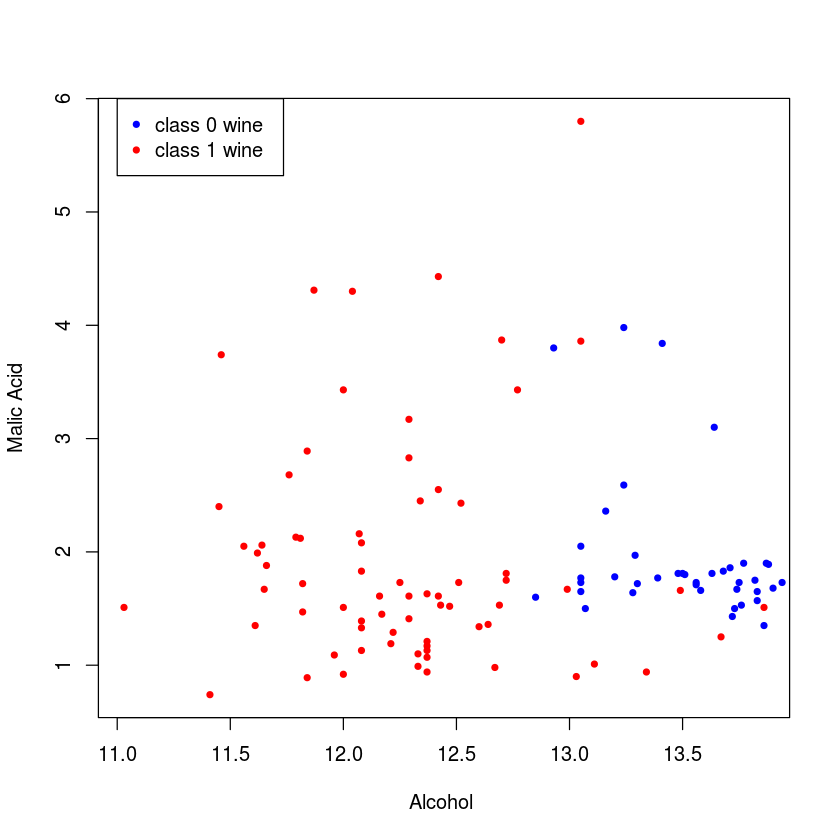

In [1]:
library(gettingtothebottom)
library(ggplot2)
library(grid)
library(Matrix)

df <- read.csv("wine.csv",header = TRUE)

X <- as.matrix(cbind(df$alcohol[1:130],df$malic_acid[1:130]), ncol=2) # Attributes : -1- Alcohol, -2- Malic acid
y <- as.matrix(df$target[1:130]) # ['class_0' 'class_1'] wine

plot(X[,1][60:130], X[,2][60:130],xlab="Alcohol ", ylab="Malic Acid", pch=20, col="red")
points(X[,1][1:59],X[,2][1:59], pch=20, col="blue")
legend(11.0,6.0,legend=c("class 0 wine", "class 1 wine"),col=c("blue", "red"),pch = 20)

b <- matrix(rnorm(2),2,1)
l <- function(X,y,b) {
-t(y)%*%(X%*%b) + sum(log(1+exp(X%*%b)))
}

grad_l <- function(X,y,b) {
-t(X)%*%(y-plogis(X%*%b))
}
alpha = 4/(svd(cbind(1,X))$d[1]**2)

# Use gradient descent algorithm to solve logistic regression problem
logistic_ex <- gdescent(l,grad_l,X,y,alpha=alpha,iter=15000)

In [2]:
library(gettingtothebottom)
library(ggplot2)
library(grid)
library(Matrix)

data = read.csv("data.csv",header = TRUE, quote = NULL)

n <- dim(data)[1] # number of samples
p <- dim(data)[2] # number of features

X <- as.matrix(cbind(data$V1[1:500],data$V2[1:500],data$V3[1:500],data$V4[1:500],data$V5[1:500]), ncol=2) 
y <- as.matrix(data$y[1:500])

l <- function(X,y,b) {
-t(y)%*%(X%*%b) + sum(log(1+exp(X%*%b)))
}

grad_l <- function(X,y,b) {
-t(X)%*%(y-plogis(X%*%b))
}
alpha = 4/(svd(cbind(1,X))$d[1]**2)

# Use gradient descent algorithm to solve logistic regression problem
logistic_ex <- gdescent(l,grad_l,X,y,alpha=alpha,iter=15000)

Minimum function value:
 242.7879

Intercept:
 -0.08284957

Coefficient(s):
 0.96433423 -0.50019772 -0.06152356 1.37510776 0.73903052

